Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.0838
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 0.0838
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 0.0838
Epoch 4/10
1/1 [==============================] - 7s 7s/step - loss: 0.0838
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.0838
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 0.0837
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.0837
Epoch 8/10
1/1 [==============================] - 3s 3s/step - loss: 0.0839
Epoch 9/10
1/1 [==============================] - 3s 3s/step - loss: 0.0838
Epoch 10/10
1/1 [==============================] - 1s 779ms/step


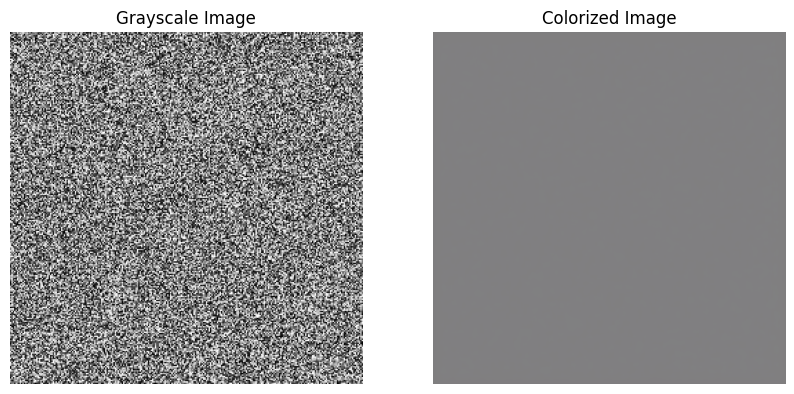

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


grayscale_image = np.random.rand(256, 256, 1)

def colorization_model(input_shape):
    inputs = Input(shape=input_shape)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(conv1)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(conv3)
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)

    up1 = UpSampling2D((2, 2))(conv6)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
    up2 = UpSampling2D((2, 2))(conv8)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up2)
    conv10 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    output = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(conv10)  # 3 channels for RGB

    model = Model(inputs=inputs, outputs=output)
    return model

input_shape = grayscale_image.shape
model = colorization_model(input_shape)

model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss

X_train = np.expand_dims(grayscale_image, axis=0)
y_train = np.expand_dims(grayscale_image, axis=0)
model.fit(X_train, y_train, epochs=10, batch_size=1)

X_test = np.expand_dims(grayscale_image, axis=0)
colorized_images = model.predict(X_test)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(X_test), cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(colorized_images))
plt.title('Colorized Image')
plt.axis('off')

plt.show()